In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
#from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Trainability

## 1D, Gaussian Function

In [2]:
x, y = generate_1D_mixed_gaussian()

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")

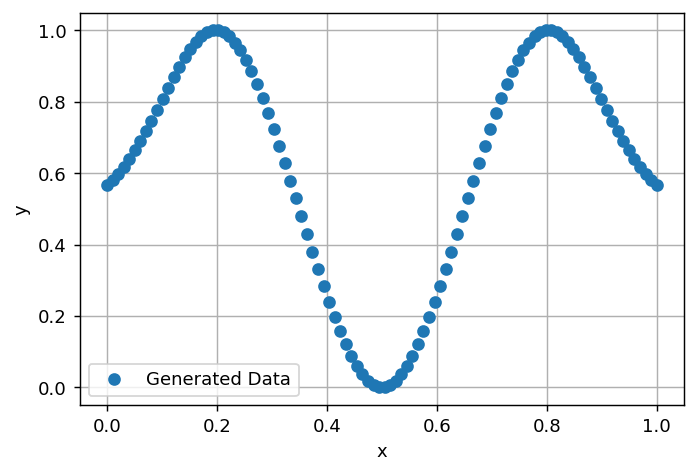

In [3]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Generated Data"])

plt.grid()
plt.show()


fig.savefig(image_path("1D_gaussian_data.pdf"), bbox_inches='tight')

In [8]:
qnn_list_qnn = loader(data_path("trainability_qnn_1D"))
qnn_list1 = loader(data_path("trainability_qcn_1D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_1D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_1D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_1D_epochs_10000"))

In [9]:
loss_qnn = np.array([qnn.loss for qnn in qnn_list_qnn])
std_qnn = np.std(loss_qnn, axis=0)
avg_qnn = np.mean(loss_qnn, axis=0)

loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

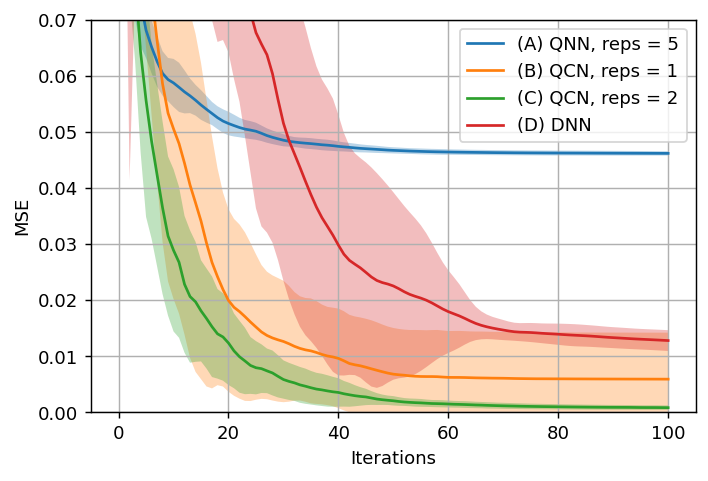

In [10]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg_qnn - std_qnn, avg_qnn + std_qnn, alpha=alpha)
plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg_qnn)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["(A) QNN, reps = 5", "(B) QCN, reps = 1", "(C) QCN, reps = 2", "(D) DNN"])
plt.grid()
plt.ylim([0, 0.07])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [11]:
print(f"QNN reps 1: {avg_qnn[-1]:.4f}")
print(f"QCN reps 1: {avg1[-1]:.4f}")
print(f"QCN reps 2: {avg2[-1]:.4f}")
print(f"DNN 1e2 epochs {avg3[-1]:.4f}")
print(f"DNN 1e4 epochs {avg4[-1]:.4f}")

QNN reps 1: 0.0461
QCN reps 1: 0.0059
QCN reps 2: 0.0008
DNN 1e2 epochs 0.0128
DNN 1e4 epochs 0.0002


## 2D

In [12]:
n = 12
x, y = generate_2D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn[:,0:1]])
x_dnn = scaler(x, mode="standard")

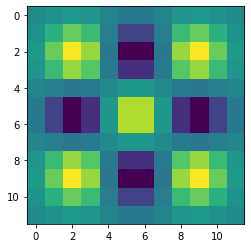

In [13]:
plt.imshow(y.reshape(n,n))
plt.show()

In [14]:
qnn_list_qnn = loader(data_path("trainability_qnn_2D"))
qnn_list1 = loader(data_path("trainability_qcn_2D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_2D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_2D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_2D_epochs_10000"))

In [15]:
loss_qnn = np.array([qnn.loss for qnn in qnn_list_qnn])
std_qnn = np.std(loss_qnn, axis=0)
avg_qnn = np.mean(loss_qnn, axis=0)

loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

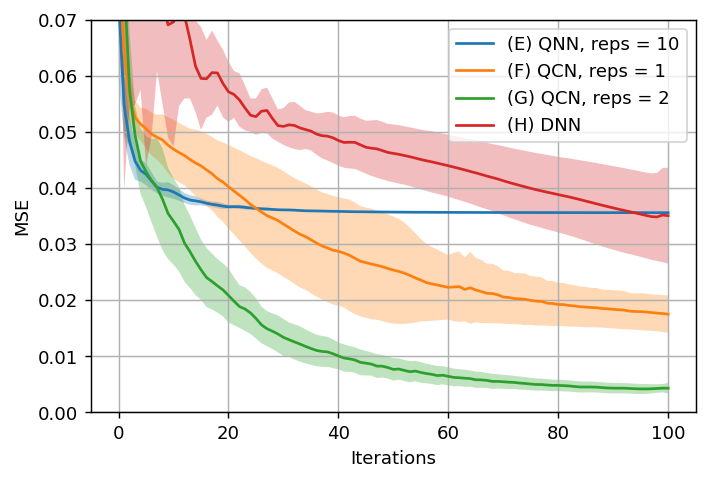

In [16]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg_qnn - std_qnn, avg_qnn + std_qnn, alpha=alpha)
plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg_qnn)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.07])
plt.legend(["(E) QNN, reps = 10", "(F) QCN, reps = 1", "(G) QCN, reps = 2", "(H) DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [17]:
print(f"QNN reps 1: {avg_qnn[-1]:.4f}")
print(f"QCN reps 1: {avg1[-1]:.4f}")
print(f"QCN reps 2: {avg2[-1]:.4f}")
print(f"DNN 1e2 epochs {avg3[-1]:.4f}")
print(f"DNN 1e4 epochs {avg4[-1]:.4f}")

QNN reps 1: 0.0356
QCN reps 1: 0.0175
QCN reps 2: 0.0043
DNN 1e2 epochs 0.0350
DNN 1e4 epochs 0.0043


## 3D

In [18]:
n = 6
x, y = generate_3D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = x_qcn
x_dnn = scaler(x, mode="standard")

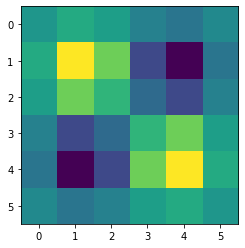

In [19]:
plt.imshow(y.reshape(n,n,n)[1])
plt.show()

In [20]:
qnn_list_qnn = loader(data_path("trainability_qnn_3D"))
qnn_list1 = loader(data_path("trainability_qcn_3D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_3D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_3D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_3D_epochs_10000"))

In [21]:
loss_qnn = np.array([qnn.loss for qnn in qnn_list_qnn])
std_qnn = np.std(loss_qnn, axis=0)
avg_qnn = np.mean(loss_qnn, axis=0)

loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

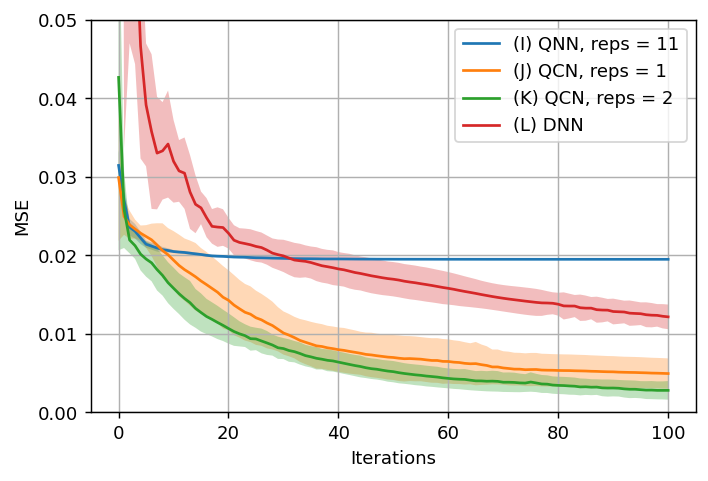

In [22]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg_qnn - std_qnn, avg_qnn + std_qnn, alpha=alpha)
plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg_qnn)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.05])
plt.legend(["(I) QNN, reps = 11","(J) QCN, reps = 1", "(K) QCN, reps = 2", "(L) DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("3D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [23]:
print(f"QNN reps 1: {avg_qnn[-1]:.4f}")
print(f"QCN reps 1: {avg1[-1]:.4f}")
print(f"QCN reps 2: {avg2[-1]:.4f}")
print(f"DNN 1e2 epochs {avg3[-1]:.4f}")
print(f"DNN 1e4 epochs {avg4[-1]:.4f}")

QNN reps 1: 0.0195
QCN reps 1: 0.0049
QCN reps 2: 0.0028
DNN 1e2 epochs 0.0121
DNN 1e4 epochs 0.0018


# Noisy

In [26]:
qnn_list_qnn = loader(data_path("trainability_qnn_1D_noisy"))

qnn_list1 = loader(data_path("trainability_qcn_1D_reps_1_noisy"))
qnn_list2 = loader(data_path("trainability_qcn_1D_reps_2_noisy"))
dnn_list1 = loader(data_path("trainability_dnn_1D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_1D_epochs_10000"))

In [27]:
loss_qnn = np.array([qnn.loss for qnn in qnn_list_qnn])
std_qnn = np.std(loss_qnn, axis=0)/2
avg_qnn = np.mean(loss_qnn, axis=0)

loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)/2
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)/2
avg4 = np.mean(loss4, axis=0)

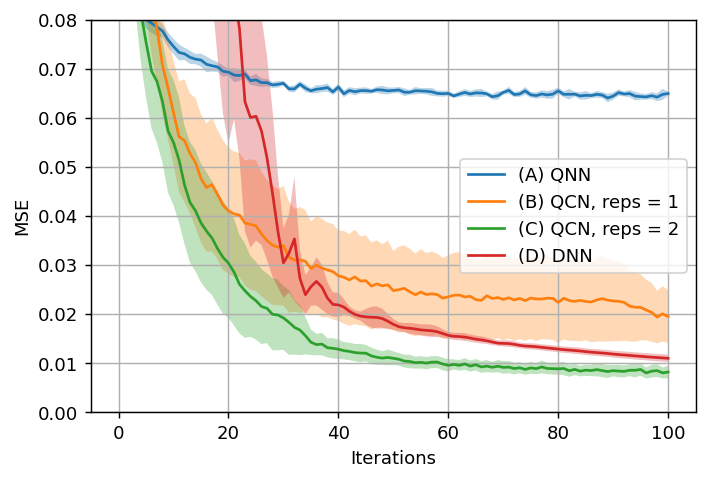

In [28]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg_qnn - std_qnn, avg_qnn + std_qnn, alpha=alpha)
plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg_qnn)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["(A) QNN", "(B) QCN, reps = 1", "(C) QCN, reps = 2", "(D) DNN"])
plt.grid()
plt.ylim([0, 0.08])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit_noisy.pdf"), bbox_inches='tight')

In [56]:
print(f"QNN reps 1: {avg_qnn[-1]:.4f}")
print(f"QCN reps 1: {avg1[-1]:.4f}")
print(f"QCN reps 2: {avg2[-1]:.4f}")
print(f"DNN 1e2 epochs {avg3[-1]:.4f}")
print(f"DNN 1e4 epochs {avg4[-1]:.4f}")

QNN reps 1: 0.0656
QCN reps 1: 0.0195
QCN reps 2: 0.0082
DNN 1e2 epochs 0.0110
DNN 1e4 epochs 0.0314


## 2D

In [57]:
qnn_list_qnn = loader(data_path("trainability_qnn_2D_noisy"))
qnn_list1 = loader(data_path("trainability_qcn_2D_reps_1_noisy"))

qnn_list2_1= loader(data_path("trainability_qcn_2D_reps_2_noisy"))
qnn_list2_2 = loader(data_path("trainability_qcn_2D_reps_2_noisy_2"))
qnn_list2_3 = loader(data_path("trainability_qcn_2D_reps_2_noisy_3"))
qnn_list2_4 = loader(data_path("trainability_qcn_2D_reps_2_noisy_4"))

dnn_list1 = loader(data_path("trainability_dnn_2D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_2D_epochs_10000"))

In [58]:
loss_qnn = np.array([qnn.loss for qnn in qnn_list_qnn])
std_qnn = np.std(loss_qnn, axis=0)/2
avg_qnn = np.mean(loss_qnn, axis=0)

loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2_1 = np.array([qnn.loss for qnn in qnn_list2_1])
loss2_2 = np.array([qnn.loss for qnn in qnn_list2_2])
loss2_3 = np.array([qnn.loss for qnn in qnn_list2_3])
loss2_4 = np.array([qnn.loss for qnn in qnn_list2_4])
loss2 = np.concatenate([loss2_1, loss2_2, loss2_3, loss2_4], axis=1)[:,:101]
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)
print(loss2.shape)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)/2
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)/2
avg4 = np.mean(loss4, axis=0)

(10, 101)


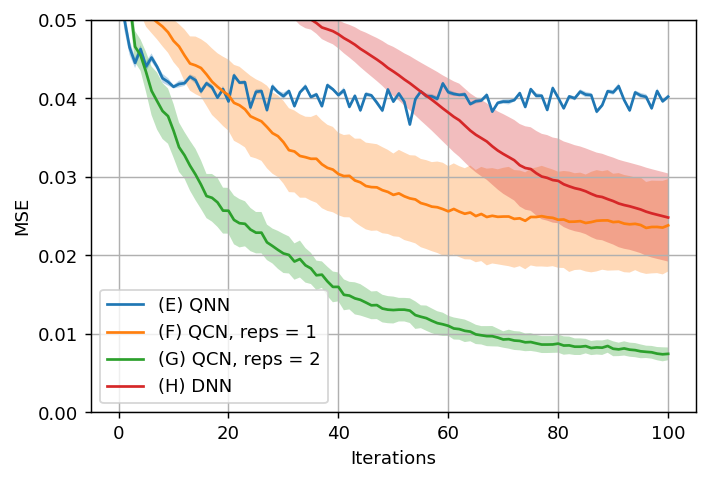

In [59]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg_qnn - std_qnn, avg_qnn + std_qnn, alpha=alpha)
plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg_qnn)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["(E) QNN", "(F) QCN, reps = 1", "(G) QCN, reps = 2", "(H) DNN"])
plt.grid()
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit_noisy.pdf"), bbox_inches='tight')

In [60]:
print(f"QNN reps 1: {avg_qnn[-1]:.4f}")
print(f"QCN reps 1: {avg1[-1]:.4f}")
print(f"QCN reps 2: {avg2[-1]:.4f}")
print(f"DNN 1e2 epochs {avg3[-1]:.4f}")
print(f"DNN 1e4 epochs {avg4[-1]:.4f}")

QNN reps 1: 0.0402
QCN reps 1: 0.0238
QCN reps 2: 0.0074
DNN 1e2 epochs 0.0248
DNN 1e4 epochs 0.0016
